<div>
    <h1>Proyecto Final</h1>
    <h2>Integrantes :</h2>
    <h3>Moises Rodriguez ID:1014-5201</h3>
    <h3>Jose Ariel Martinez Dabas ID:1014-4270</h3>
    <h3>Armando Gonzalez ID:</h3>
    

</div>

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [107]:
df_contenido = pd.read_csv('Contenido_Quiz.csv')
df_contenido_2 = pd.read_csv('tabla_Contenido2.csv')
df_contenido['Tematica'] = df_contenido_2['Tematica']




In [108]:
df_contenido.head()

,Contenido,Título del video,Año,Trimestre,Mes,Día,Suma de Vistas,Suma de Tiempo de reproducción (horas),Suma de Tasa de clics de las impresiones (%),Suscriptores,Suma de Impresiones,Duración promedio de vistas,Tematica
0,_ESSB71MDag,Planets Quiz,2024.0,Trim. 3,julio,18.0,38,1908,127,0,473,1899-12-30 00:00:18,Ciencia
1,0-pH13n590k,Would You Rather | Taylor Swift #swifties #wou...,2024.0,Trim. 3,agosto,11.0,83,3761,241,0,540,1899-12-30 00:00:16,Cultura Pop
2,2eNWSMedga0,Design Your DREAM HALLOWEEN House Room by Room?,2024.0,Trim. 4,octubre,27.0,72,1453,414,0,1184,1899-12-30 00:01:12,Tematica por Temporada
3,7rijZHQNbq0,Olympics Quiz | Short Quiz,2024.0,Trim. 3,julio,2.0,54,3029,601,1,366,1899-12-30 00:00:20,Deportiva
4,8EWRh-nRfxg,Harry Potter EXPERTS Only! Tricky Questions Ah...,2024.0,Trim. 3,septiembre,12.0,3246,1196582,395,13,66361,1899-12-30 00:02:12,Pelicula


<h2>Tabla utlizada</h2>
<p>
Utilizamos la tabla que contiene toda la información relacionada con los videos, ya que nos permite realizar mediciones cuantitativas más precisas para analizar la relación entre los videos, la atención del público y los posibles resultados positivos.
</p>

In [109]:
# df_contenido_pre = df_contenido[['Contenido','Título del video','Suma de Vistas','']]
print(df_contenido.index)
df_contenido['Duración promedio de vistas'] = pd.to_datetime(df_contenido['Duración promedio de vistas']).dt.time


RangeIndex(start=0, stop=36, step=1)


<p>Aquí analizamos la columna 'Duración promedio de vistas' y observamos que su formato actual no es adecuado para alcanzar los objetivos planteados. Por ello, realizaremos algunos ajustes para optimizar su uso y obtener resultados más relevantes.</p>

In [110]:
df_contenido['Duración promedio de vistas'] = df_contenido['Duración promedio de vistas'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
df_contenido['Duración promedio de vistas'].head()

0     18
1     16
2     72
3     20
4    132
Name: Duración promedio de vistas, dtype: int64

In [111]:
df_contenido = df_contenido.drop(index = 29, axis=0)

<p>
Aqui se convierte la columna 'Duración promedio de vistas' en segundos. Para cada valor de la columna, se toma la hora, minuto y segundo, se convierten a segundos y luego se suman. El resultado se almacena nuevamente en la misma columna.
</p>

In [112]:
df_contenido.head()


,Contenido,Título del video,Año,Trimestre,Mes,Día,Suma de Vistas,Suma de Tiempo de reproducción (horas),Suma de Tasa de clics de las impresiones (%),Suscriptores,Suma de Impresiones,Duración promedio de vistas,Tematica
0,_ESSB71MDag,Planets Quiz,2024.0,Trim. 3,julio,18.0,38,1908,127,0,473,18,Ciencia
1,0-pH13n590k,Would You Rather | Taylor Swift #swifties #wou...,2024.0,Trim. 3,agosto,11.0,83,3761,241,0,540,16,Cultura Pop
2,2eNWSMedga0,Design Your DREAM HALLOWEEN House Room by Room?,2024.0,Trim. 4,octubre,27.0,72,1453,414,0,1184,72,Tematica por Temporada
3,7rijZHQNbq0,Olympics Quiz | Short Quiz,2024.0,Trim. 3,julio,2.0,54,3029,601,1,366,20,Deportiva
4,8EWRh-nRfxg,Harry Potter EXPERTS Only! Tricky Questions Ah...,2024.0,Trim. 3,septiembre,12.0,3246,1196582,395,13,66361,132,Pelicula


<h2> Modelo descriptivo con clústeres</h2>

<p>
Buscamos un enfoque de análisis de datos que se utiliza para identificar grupos o patrones en un conjunto de datos sin la necesidad de etiquetas predefinidas (es decir, sin supervisión). Los clústeres son subconjuntos de datos que comparten características similares, y el objetivo del modelo es explorar y describir estos grupos para obtener insights más detallados y útiles.
</p>

In [113]:
df_pre = df_contenido[['Suma de Vistas','Suma de Tasa de clics de las impresiones (%)','Duración promedio de vistas', 'Suscriptores']]
df_pre.head()



,Suma de Vistas,Suma de Tasa de clics de las impresiones (%),Duración promedio de vistas,Suscriptores
0,38,127,18,0
1,83,241,16,0
2,72,414,72,0
3,54,601,20,1
4,3246,395,132,13


<p>
    Aquí se seleccionan las columnas que se utilizarán para el análisis. En este caso, se eligen las columnas 'Suma de Vistas', 'Suma de Tasa de clics de las impresiones (%)' y 'Duración promedio de vistas', ya que son datos cuantitativos útiles para el análisis mediante clústeres.
</p>

In [114]:
# Convertir a numérico y manejar valores faltantes
df_pre = df_pre.apply(pd.to_numeric, errors='coerce')
df_pre = df_pre.dropna()

# Normalizar los datos
scaler = StandardScaler()
df_pre_scaled = scaler.fit_transform(df_pre)

<p>
Aqui se convierte los datos no numéricos a numéricos, elimina las filas con datos faltantes y luego normaliza los datos para que todas las columnas tengan una escala uniforme. Este proceso es útil, especialmente para algoritmos como K-means o PCA, que son sensibles a las diferencias de escala entre las características.
</p>

In [115]:
X = df_pre

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<p>
Aqui se asigna los datos de df_pre a la variable X, y luego normaliza estos datos usando StandardScaler. El resultado es que los datos de X_scaled estarán en una escala común, con media 0 y desviación estándar 1. Esto es especialmente útil cuando se usan algoritmos que dependen de la distancia, como K-means.
</p>

<h3>Método del Codo (Elbow Method)</h3>

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

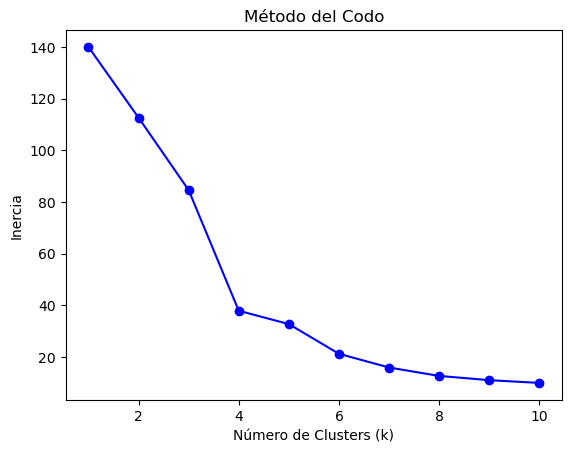

In [116]:
inertia = []
k_range = range(1, 11)  # Probar de 1 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pre_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

<p>
El método del codo se utiliza para elegir el número óptimo de clústeres k en el análisis de K-means. Se busca el punto en el gráfico donde la inercia comienza a disminuir a un ritmo más lento (formando un "codo"). Este punto sugiere que agregar más clústeres no aporta mejoras significativas en la compactación de los clústeres, lo que indica el número ideal de clústeres.

Para este caso se utiliza el método del codo para determinar cuántos clústeres deben utilizarse en un modelo K-means, probando con diferentes valores de k (de 1 a 10) y graficando la inercia para cada uno. La gráfica resultante ayudará a identificar el valor óptimo de k basado en el comportamiento de la inercia.
</p>

<h3>Analisis del grafico</h3>
<p>
El punto del codo indica el número óptimo de clústeres. En este gráfico, el codo parece estar en k = 3 o k = 4. Esto significa que, a partir de este punto, agregar más clústeres no proporciona una mejora significativa en la inercia, y por lo tanto, el número óptimo de clústeres para el análisis es probablemente 3 o 4.
</p>

<h2>Coeficiente de Silhuettte</h2>

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

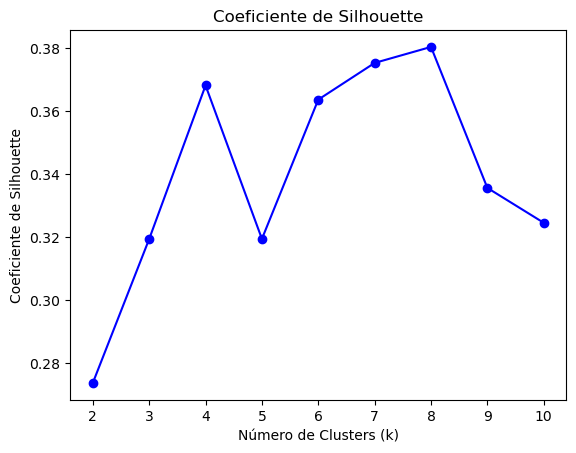

In [117]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):  # Probar de 2 a 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_pre_scaled)
    silhouette_scores.append(silhouette_score(df_pre_scaled, labels))

# Graficar el coeficiente de Silhouette
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Coeficiente de Silhouette')
plt.show()


<p>
El coeficiente de Silhouette es útil para determinar el número óptimo de clústeres en un análisis de K-means. En general cuando un valor más alto del coeficiente de Silhouette sugiere que el número de clústeres elegido es el adecuado, ya que los puntos dentro de los clústeres son más similares entre sí y más distintos de los de otros clústeres. El máximo valor de Silhouette en el gráfico indicaría el número de clústeres más óptimo.

Aqui calculamos el coeficiente de Silhouette para varios valores de k (de 2 a 10) en un análisis de K-means y genera un gráfico para visualizar cómo cambia este coeficiente según el número de clústeres. Un valor más alto del coeficiente sugiere una mejor calidad en la asignación de los puntos a los clústeres.
</p>

<h2>Analisis del grafico</h2>
<p>
El coeficiente de Silhouette alcanza su valor máximo alrededor de k=4, con un valor cercano a 0.550.
A partir de ahí, el coeficiente disminuye, alcanzando un mínimo en k=7, para luego aumentar ligeramente antes de volver a disminuir. Este análisis sugiere que 4 clusters podrían ser el número óptimo, ya que maximiza la calidad de la agrupación en tus datos.
</p>

In [118]:
# Aplicar K-Means con el número óptimo de clusters
optimal_k = 4  # Reemplazar con el valor óptimo encontrado
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_pre['Cluster'] = kmeans.fit_predict(df_pre_scaled)


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<h2>Resultados con el Coeficiente de Silhuettte</h2>

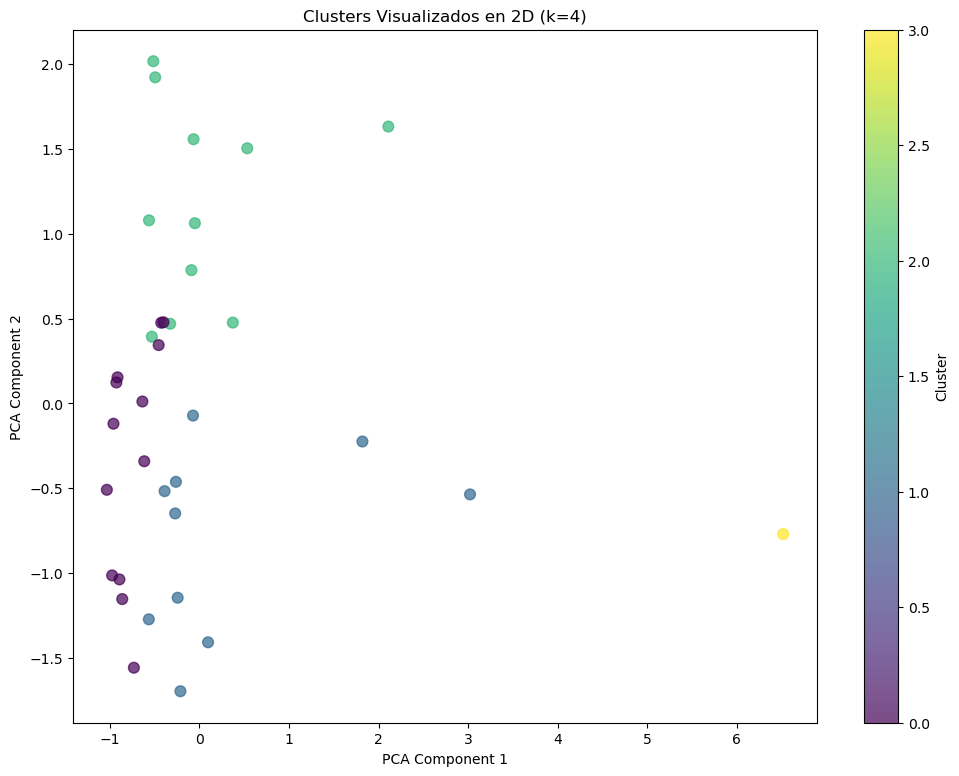

In [121]:
from sklearn.decomposition import PCA

# Reducir las dimensiones a 2 con PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_pre_scaled)

# Crear un scatter plot con colores por cluster
plt.figure(figsize=(12, 9))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_pre['Cluster'], cmap='viridis', s=60, alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualizados en 2D (k=4)')
plt.colorbar(scatter, label='Cluster')
plt.show()


In [100]:
cluster_summary = df_pre.groupby('Cluster').mean()
print(cluster_summary)
cluster_summary


         Suma de Vistas  Suma de Tasa de clics de las impresiones (%)  \
Cluster                                                                 
0            253.769231                                    180.230769   
1            702.200000                                    279.700000   
2            451.909091                                    497.000000   
3           6961.000000                                    189.000000   

         Duración promedio de vistas  Suscriptores  
Cluster                                             
0                          25.307692      0.692308  
1                         110.400000      3.400000  
2                          43.545455      3.545455  
3                          47.000000     30.000000  


,Suma de Vistas,Suma de Tasa de clics de las impresiones (%),Duración promedio de vistas,Suscriptores
Cluster,,,,
0,253.769231,180.230769,25.307692,0.692308
1,702.200000,279.700000,110.400000,3.400000
2,451.909091,497.000000,43.545455,3.545455
3,6961.000000,189.000000,47.000000,30.000000


<h2>Interpretación de Clusters</h2>
<p>
<b>Cluster 0 (Desempeño bajo)</b>
Este cluster se caracteriza por tener un número moderado de vistas, con un promedio de 253.77 por video. La tasa de clics (CTR) es alta, alcanzando el 180.23%. Sin embargo, la duración promedio de vistas es baja, con solo 25.31 minutos. En términos de suscriptores, el rendimiento también es bajo, con 0.69 suscriptores obtenidos por video en promedio. En conclusión, estos videos tienen un desempeño general bajo y no logran atraer una cantidad significativa de suscriptores.

<b>Cluster 1 (Desempeño alto)</b>
Este grupo presenta un número alto de vistas, con un promedio de 702.20 por video. La tasa de clics es alta, alcanzando el 279.70%. La duración promedio de vistas es alta, con 110.40 minutos. En cuanto a suscriptores, hay una ganancia moderada, con 3.40 suscriptores obtenidos por video en promedio. En resumen, estos videos tienen un mejor desempeño que los del Cluster 0, especialmente en términos de CTR y duración de vistas, pero aún no alcanzan niveles óptimos de conversión a suscriptores.

<b>Cluster 2 (Desempeño moderado)</b>
Este cluster presenta un número moderado de vistas, con un promedio de 451.91 por video. La tasa de clics es muy alta, alcanzando el 497%. La duración promedio de vistas es moderada, con 43.55 minutos. En términos de suscriptores, estos videos tienen el mejor rendimiento, con 3.55 suscriptores obtenidos por video en promedio. En conclusión, estos videos se destacan por su capacidad para generar vistas y retención, y convierten estas métricas en una cantidad moderada de suscriptores.

<p>


In [130]:
df_contenido['Cluster'] = kmeans.labels_
cluster_2_videos = df_contenido[df_contenido['Cluster'] == 2 ]
cluster_1_videos = df_contenido[df_contenido['Cluster'] == 1 ]

In [138]:
cluster_1_videos['Flujo de subcritores'] = df_contenido['Suscriptores'].apply(lambda x: 'buen flujo' if x > 5 else 'mal flujo')
cluster_1_videos[['Título del video', 'Suma de Vistas', 'Duración promedio de vistas', 'Suscriptores','Flujo de subcritores','Tematica']]

C:\Users\DELL\AppData\Local\Temp\ipykernel_3284\3343830296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_videos['Flujo de subcritores'] = df_contenido['Suscriptores'].apply(lambda x: 'buen flujo' if x > 5 else 'mal flujo')


,Título del video,Suma de Vistas,Duración promedio de vistas,Suscriptores,Flujo de subcritores,Tematica
1,Would You Rather | Taylor Swift #swifties #wou...,83,16,0,mal flujo,Cultura Pop
2,Design Your DREAM HALLOWEEN House Room by Room?,72,72,0,mal flujo,Tematica por Temporada
12,Name the Flower | Facts Quiz,235,101,1,mal flujo,Educativa
16,Would You Rather ..? | Disney Parks 🏰 🎢 🧚 |...,278,79,1,mal flujo,Aventura
18,Women in History | Facts Quiz,100,55,1,mal flujo,Historia
19,Would you rather… Olympics,597,23,1,mal flujo,Deportiva
21,MLB All-Star Game,63,19,0,mal flujo,Deportiva
23,Water Cycle Quiz | Facts Quiz,212,105,2,mal flujo,Educativa
24,Would You Rather... Hardest Choices Edition,639,144,1,mal flujo,Fantasia
25,Flags Quiz for Kids | Facts Quiz,153,58,2,mal flujo,Geografia


In [137]:

cluster_2_videos['Flujo de subcritores'] = df_contenido['Suscriptores'].apply(lambda x: 'buen flujo' if x > 5 else 'mal flujo')
cluster_2_videos[['Título del video', 'Suma de Vistas', 'Duración promedio de vistas', 'Suscriptores','Flujo de subcritores','Tematica']]

C:\Users\DELL\AppData\Local\Temp\ipykernel_3284\3443986855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2_videos['Flujo de subcritores'] = df_contenido['Suscriptores'].apply(lambda x: 'buen flujo' if x > 5 else 'mal flujo')


,Título del video,Suma de Vistas,Duración promedio de vistas,Suscriptores,Flujo de subcritores,Tematica
3,Olympics Quiz | Short Quiz,54,20,1,mal flujo,Deportiva
4,Harry Potter EXPERTS Only! Tricky Questions Ah...,3246,132,13,buen flujo,Pelicula
6,Would You Rather...? 🚀 Space Edition! #Shorts,469,23,4,mal flujo,Ciencia
7,Would You Rather ... 5 Tough Choices! 🤯 #short...,560,20,3,mal flujo,Fantasia
8,Capitals of the World Quiz | Facts Quiz,101,40,0,mal flujo,Geografia
9,Halloween SPECIAL EDITION Choose one button: Y...,559,76,5,mal flujo,Tematica por Temporada
11,Animal Quiz for Kids | Facts Quiz,145,57,8,buen flujo,Educativa
14,The Most Difficult Flag Quiz Ever (Can You Get...,2252,44,12,buen flujo,Geografia
17,Harry Potter | Facts Quiz,1516,105,12,buen flujo,Pelicula
22,Olympics Quiz | Facts Quiz,6961,47,30,buen flujo,Deportiva


<h2>Conclusión de Resultados y Clusters</h2>
<p>
Para determinar qué tipo de video es más efectivo para ganar más suscriptores o vistas, es necesario analizar las características de los videos en cada cluster. El análisis revela diferencias significativas entre los clusters en términos de desempeño y características de los videos.

En el Cluster 1, los videos presentan un rendimiento bajo en términos de vistas, con un promedio de solo 260 vistas por video. La duración promedio de vistas varía, pero se mantiene en un promedio de aproximadamente 53.67 minutos, lo que sugiere una retención moderada. Sin embargo, los suscriptores son generalmente bajos, con muchos videos ganando de 0 a 1 suscriptor. En cuanto al flujo de suscriptores, la mayoría de los videos tienen un mal flujo, lo que indica que no logran convertir vistas en nuevos seguidores de manera efectiva. Las temáticas de estos videos son variadas, abarcando trivias, deportes, historia y contenido de entretenimiento.

En el Cluster 2, los videos tienen un desempeño significativamente mejor. El promedio de vistas es mucho más alto, con 1609 vistas por video. La duración promedio de vistas también varía, alcanzando un promedio de 57.73 minutos, lo que sugiere una mayor retención y un contenido que mantiene a la audiencia más tiempo. Los suscriptores son generalmente altos, con muchos videos obteniendo más de 4 suscriptores, y el flujo de suscriptores es más variado, con muchos videos experimentando un buen flujo. Las temáticas de los videos en este cluster incluyen contenido popular como Harry Potter, trivias olímpicas y ediciones especiales como Halloween.

En cuanto a la efectividad para ganar suscriptores, los videos del Cluster 2 son claramente más efectivos, especialmente aquellos relacionados con temas populares como Harry Potter y eventos especiales como Halloween. Los videos que presentan un buen flujo de suscriptores tienden a tener una duración de vistas más prolongada y un contenido atractivo que mantiene el interés de la audiencia.

En términos de efectividad para ganar vistas, el Cluster 2 también sobresale. Los temas populares y las ediciones especiales atraen a una audiencia más amplia. Los videos que combinan temas populares con interactividad, como las trivias y los formatos tipo "Would You Rather...", tienden a tener un mejor rendimiento en vistas.

Recomendaciones
Basado en los hallazgos, es recomendable enfocar la producción de contenido en temáticas populares que ya han demostrado ser exitosas, como Harry Potter, los eventos olímpicos y las ediciones especiales. Además, los videos que incorporan interactividad y entretenimiento, como trivias y formatos de "Would You Rather...", tienden a atraer más vistas y retienen mejor a la audiencia.

Finalmente, optimizar la duración de los videos puede ser clave para mejorar el flujo de suscriptores. Los videos con una duración promedio de vistas más larga parecen correlacionar con un mayor flujo de suscriptores, por lo que optimizar los videos para mantener el interés de los espectadores por más tiempo podría resultar en un mayor número de suscriptores y vistas.

</p>

<h2>Pruebas con modelos diferentes</h2>

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

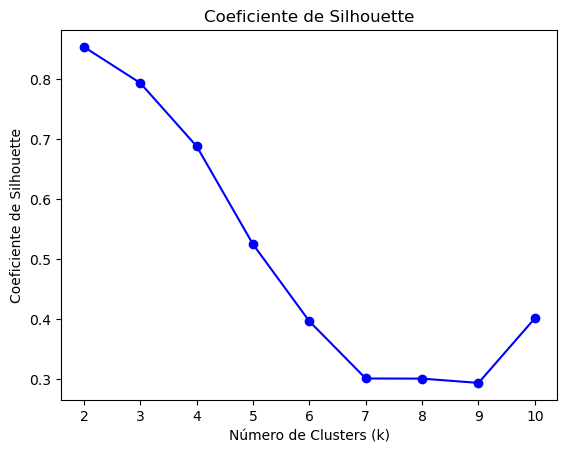

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


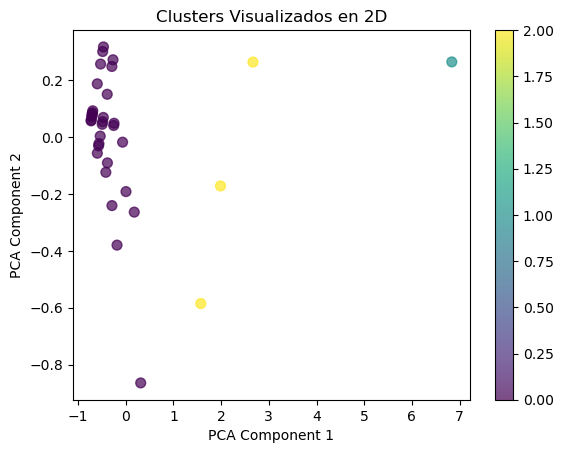

         Suma de Vistas  Suscriptores
Cluster                              
0            267.032258      1.451613
1           6961.000000     30.000000
2           2338.000000     12.333333


,Suma de Vistas,Suscriptores
Cluster,,
0,267.032258,1.451613
1,6961.000000,30.000000
2,2338.000000,12.333333


In [148]:
from sklearn.metrics import silhouette_score

df_pre = df_contenido[['Suma de Vistas', 'Suscriptores']]
df_pre.head()
# Convertir a numérico y manejar valores faltantes
df_pre = df_pre.apply(pd.to_numeric, errors='coerce')
df_pre = df_pre.dropna()

# Normalizar los datos
scaler = StandardScaler()
df_pre_scaled = scaler.fit_transform(df_pre)



silhouette_scores = []
for k in range(2, 11):  # Probar de 2 a 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_pre_scaled)
    silhouette_scores.append(silhouette_score(df_pre_scaled, labels))

# Graficar el coeficiente de Silhouette
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Coeficiente de Silhouette')
plt.show()

# Aplicar K-Means con el número óptimo de clusters
optimal_k = 3  # Reemplazar con el valor óptimo encontrado
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_pre['Cluster'] = kmeans.fit_predict(df_pre_scaled)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_pre_scaled)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_pre['Cluster'], cmap='viridis', s=50, alpha =0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualizados en 2D')
plt.colorbar()
plt.show()

cluster_summary = df_pre.groupby('Cluster').mean()
print(cluster_summary)
cluster_summary


In [145]:
df_contenido['Cluster'] = kmeans.labels_
cluster_2_videos = df_contenido[df_contenido['Cluster'] == 2 ]
cluster_1_videos = df_contenido[df_contenido['Cluster'] == 1 ]

In [146]:
cluster_1_videos['Flujo de subcritores'] = df_contenido['Suscriptores'].apply(lambda x: 'buen flujo' if x > 5 else 'mal flujo')
cluster_1_videos[['Título del video', 'Suma de Vistas', 'Duración promedio de vistas', 'Suscriptores','Flujo de subcritores','Tematica']]

C:\Users\DELL\AppData\Local\Temp\ipykernel_3284\3343830296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_videos['Flujo de subcritores'] = df_contenido['Suscriptores'].apply(lambda x: 'buen flujo' if x > 5 else 'mal flujo')


,Título del video,Suma de Vistas,Duración promedio de vistas,Suscriptores,Flujo de subcritores,Tematica
22,Olympics Quiz | Facts Quiz,6961,47,30,buen flujo,Deportiva


In [147]:
cluster_2_videos['Flujo de subcritores'] = df_contenido['Suscriptores'].apply(lambda x: 'buen flujo' if x > 5 else 'mal flujo')
cluster_2_videos[['Título del video', 'Suma de Vistas', 'Duración promedio de vistas', 'Suscriptores','Flujo de subcritores','Tematica']]

C:\Users\DELL\AppData\Local\Temp\ipykernel_3284\34885806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2_videos['Flujo de subcritores'] = df_contenido['Suscriptores'].apply(lambda x: 'buen flujo' if x > 5 else 'mal flujo')


,Título del video,Suma de Vistas,Duración promedio de vistas,Suscriptores,Flujo de subcritores,Tematica
4,Harry Potter EXPERTS Only! Tricky Questions Ah...,3246,132,13,buen flujo,Pelicula


<h2>Conclusiones</h2>
<p>
Al analizar los resultados proporcionados, se observan varias tendencias interesantes en el desempeño de los videos de cada cluster, que nos permiten sacar conclusiones sobre qué tipos de contenido son más efectivos para generar vistas y suscriptores.

Cluster 0 tiene el desempeño más bajo en términos de vistas y suscriptores, con un promedio de 267.03 vistas y 1.45 suscriptores por video. Los videos de este cluster requieren una revisión profunda y probablemente una estrategia mejorada para aumentar tanto las vistas como los suscriptores. Este grupo podría beneficiarse de una revisión en la forma en que se presenta el contenido, las miniaturas o las llamadas a la acción.

Cluster 1, por otro lado, tiene un desempeño sobresaliente. Con un promedio de 6961 vistas y 30 suscriptores por video, este cluster destaca por su éxito, especialmente con el video representativo de temática deportiva "Olympics Quiz | Facts Quiz". Este video ha logrado atraer una gran cantidad de vistas y suscriptores, con una duración promedio de vistas de 47 minutos, lo que sugiere que los videos de temática deportiva y relacionada con eventos pueden ser extremadamente efectivos para generar suscriptores. El flujo de suscriptores es excelente en este grupo, lo que indica que los videos logran convertir vistas en suscriptores de manera efectiva.

Cluster 2 también muestra un buen rendimiento, con un promedio de 2338 vistas y 12.33 suscriptores por video. Este cluster incluye una variedad de videos, como "Harry Potter EXPERTS Only! Tricky Questions Ah..." y "The Most Difficult Flag Quiz Ever (Can You Get All 10?)". Los videos de temática relacionada con películas populares como Harry Potter, junto con temas educativos como geografía, parecen ser efectivos para atraer a una audiencia dedicada. La duración promedio de vistas varía, siendo 132 minutos para algunos videos de Harry Potter, lo que sugiere que los videos largos y atractivos logran mantener la atención del espectador, y que los temas educativos, combinados con temas populares, también son eficaces.

Observaciones Generales
En términos de desempeño, las temáticas populares juegan un papel importante en la atracción de vistas y suscriptores. Los videos relacionados con deportes (Cluster 1) y películas populares como Harry Potter (Cluster 2) tienden a tener un mejor desempeño tanto en vistas como en suscriptores. Esto sugiere que los temas que están de moda o son culturalmente relevantes tienen una mayor probabilidad de generar un mayor interés y compromiso por parte de la audiencia. Además, el contenido interesante y educativo, especialmente cuando se combina con temas populares, puede atraer a una audiencia más comprometida. Los videos de trivia educativa sobre geografía y películas parecen tener una fuerte capacidad para atraer una audiencia que valora tanto el entretenimiento como el aprendizaje. Finalmente, los videos con una duración promedio de vistas más larga parecen correlacionarse con un mayor número de suscriptores. Esto sugiere que mantener a los espectadores interesados durante más tiempo, a través de contenido valioso y entretenido, no solo mejora el compromiso sino que también puede llevar a un mayor número de suscriptores.

Recomendaciones crear más contenido relacionado con temas que ya han demostrado ser exitosos, como deportes y películas populares, especialmente Harry Potter.
Combinación de Contenido Educativo y Entretenimiento: Incluir temas educativos dentro de formatos interactivos y populares puede atraer una audiencia más comprometida y leal.
Optimización de la Duración: Los videos que mantienen la atención de los espectadores por más tiempo parecen generar un mayor número de suscriptores, por lo que optimizar el contenido para maximizar la retención puede ser una estrategia clave.
<p>